In [3]:
# import
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

In [4]:
# 데이터 가져오기
df = pd.read_csv('../Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
# 'RowNumber', 'CustomerId', 'Surname' 컬럼 drop
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


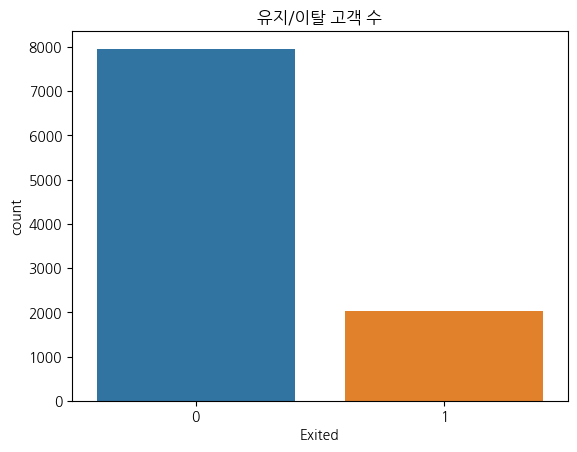

In [7]:
# '유지/이탈 고객 수'
sns.countplot(data=df, x='Exited')
plt.title('유지/이탈 고객 수')
plt.show()

# Age/ Tenure/ Balance/	NumOfProducts
- Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts : refers to the number of products that a customer has purchased through the bank.

## Age
- Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

In [8]:
# 나이 컬럼에서 최소값과 최대값 찾기
min_age = df['Age'].min()
max_age = df['Age'].max()

# 결과 출력
print("최소나이:", min_age)
print("최대나이:", max_age)

최소나이: 18
최대나이: 92


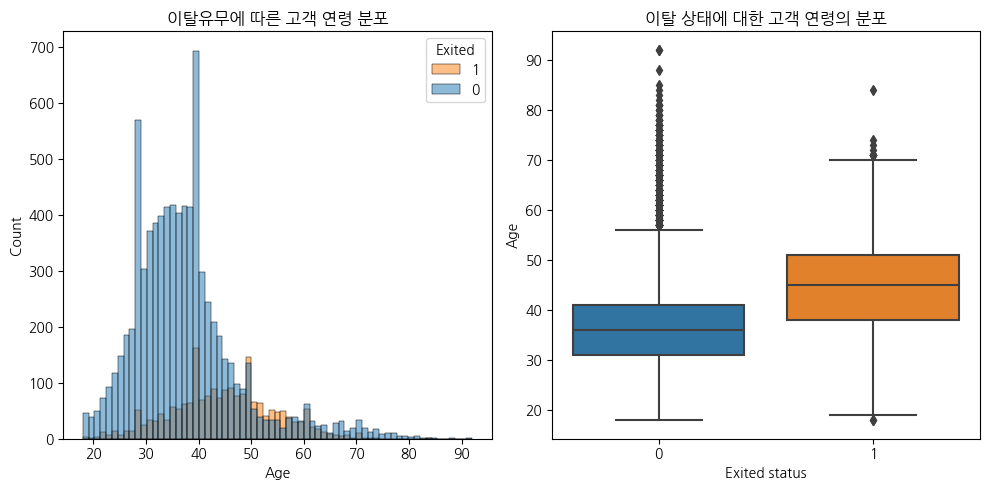

In [9]:
# 이탈유무에 따른 나이 분포
# 나이에 따른 고객이탈률을 boxplot으로 이상치 확인

fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'Age', hue= 'Exited', ax= ax[0])
ax1.set_title('이탈유무에 따른 고객 연령 분포')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Age')
ax2 = sns.boxplot(data= df, y= 'Age', x= 'Exited', ax= ax[1])
ax2.set_title('이탈 상태에 대한 고객 연령의 분포')
ax2.set_ylabel('Age')
ax2.set_xlabel('Exited status')

plt.tight_layout()
plt.show()

참고: https://www.kaggle.com/code/damodarabarbosa/customer-churn-8-classification-models/notebook

- 나이의 분포가 너무 집중되어있다.
- 유지고객은 30~40대에 몰려있고, 이탈고객은 40~50대에 몰려있다.

In [10]:
# 연령별 이탈 비율
age_churn_rate = df.groupby('Age')['Exited'].mean() * 100

age_churn_rate

Age
18     9.090909
19     3.703704
20     5.000000
21     5.660377
22    14.285714
        ...    
83     0.000000
84    50.000000
85     0.000000
88     0.000000
92     0.000000
Name: Exited, Length: 70, dtype: float64

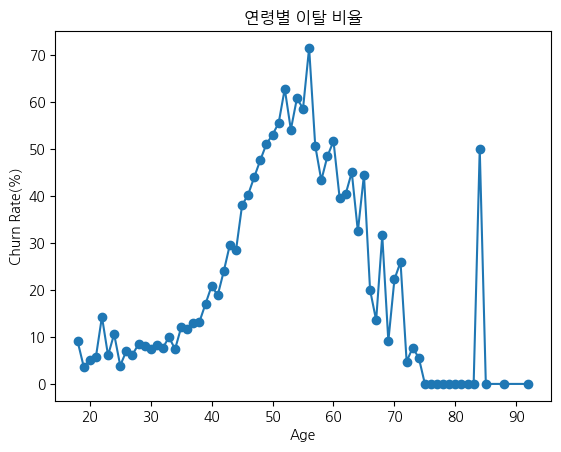

In [11]:
plt.plot(age_churn_rate.index, age_churn_rate.values, marker='o')
plt.title('연령별 이탈 비율')
plt.xlabel('Age')
plt.ylabel('Churn Rate(%)')
plt.show()

유럽 나이기준으로 만 18세라고 가정하고 78세 이후로 컬럼을 조정하기로 함

## Tenure(고객 기간)
- Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

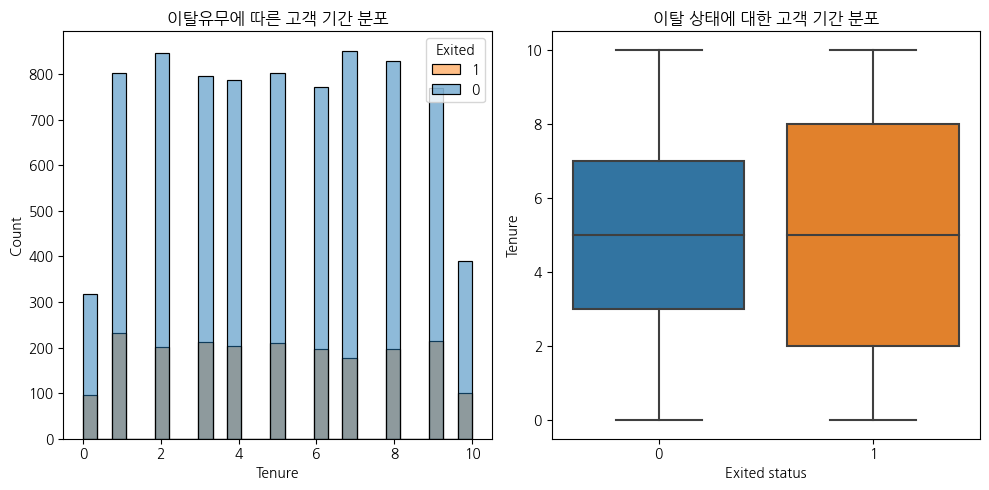

In [12]:
# 이탈유무에 따른 고객 기간 분포
# 고객기간에 따른 고객이탈률을 boxplot으로 이상치 확인

fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'Tenure', hue= 'Exited', ax= ax[0])
ax1.set_title('이탈유무에 따른 고객 기간 분포')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Tenure')
ax2 = sns.boxplot(data= df, y= 'Tenure', x= 'Exited', ax= ax[1])
ax2.set_title('이탈 상태에 대한 고객 기간 분포')
ax2.set_ylabel('Tenure')
ax2.set_xlabel('Exited status')

plt.tight_layout()
plt.show()

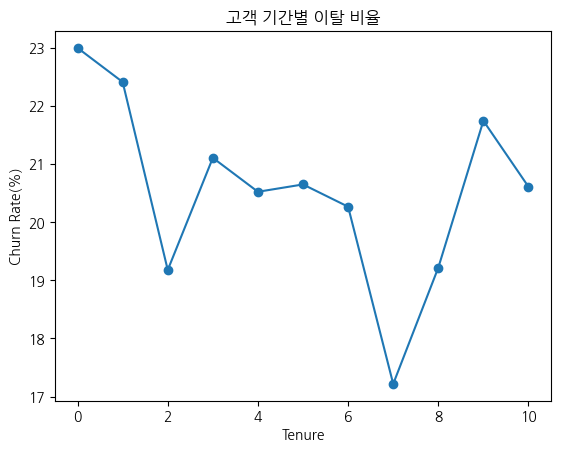

In [13]:
# 고객 기간별 이탈 비율
tenure_exit_rates = df.groupby('Tenure')['Exited'].mean()*100

plt.plot(tenure_exit_rates.index, tenure_exit_rates.values, marker='o')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate(%)')
plt.title('고객 기간별 이탈 비율')
plt.show()

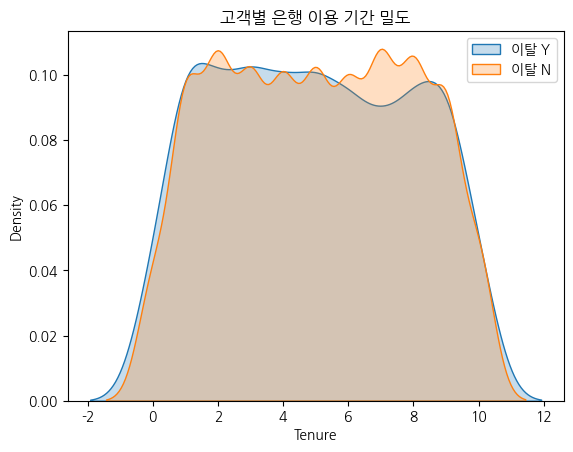

In [14]:
# 전체 고객들의 은행 이용 기간 밀도 그래프
churned_customers = df[df['Exited'] == 1]['Tenure']
non_churned_customers = df[df['Exited'] == 0]['Tenure']

sns.kdeplot(churned_customers, shade=True, label='이탈 Y')
sns.kdeplot(non_churned_customers, shade=True, label='이탈 N')

plt.title('고객별 은행 이용 기간 밀도')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()

In [15]:
# 고객 기간별 연령대 계산

# 연령대 구분 기준 설정
age_bins = [0, 17, 28, 38, 48, 58, 68, 78, 92]
age_labels = ['0-18','18-28', '28-38', '38-48', '48-58', '58-68', '68-78','78-92']

# 고객의 기간별 연령대 계산
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 각 기간별 연령대의 고객 수 계산
tenure_age_counts = df.groupby('Tenure')['AgeGroup'].value_counts().unstack()

tenure_age_counts

AgeGroup,0-18,18-28,28-38,38-48,48-58,58-68,68-78,78-92
Tenure,,,,,,,,
0,0,45,179,130,33,19,6,1
1,0,124,446,285,115,46,17,2
2,0,123,459,313,91,46,15,1
3,0,130,432,288,93,46,18,2
4,0,152,413,271,105,36,11,1
5,0,129,414,308,92,46,21,2
6,0,110,426,301,80,29,18,3
7,0,158,435,280,99,47,8,1
8,0,157,437,270,108,39,11,3


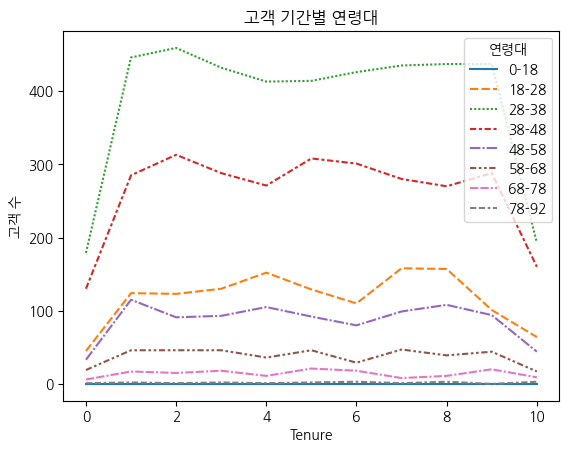

In [16]:
# 연령대별 고객 수 라인 그래프
sns.lineplot(data=tenure_age_counts)

plt.title('고객 기간별 연령대')
plt.xlabel('Tenure')
plt.ylabel('고객 수')
plt.legend(title='연령대')

plt.show()


고객 기간은 이탈과 상관이 없다는 결론이다.

## Balance
- Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

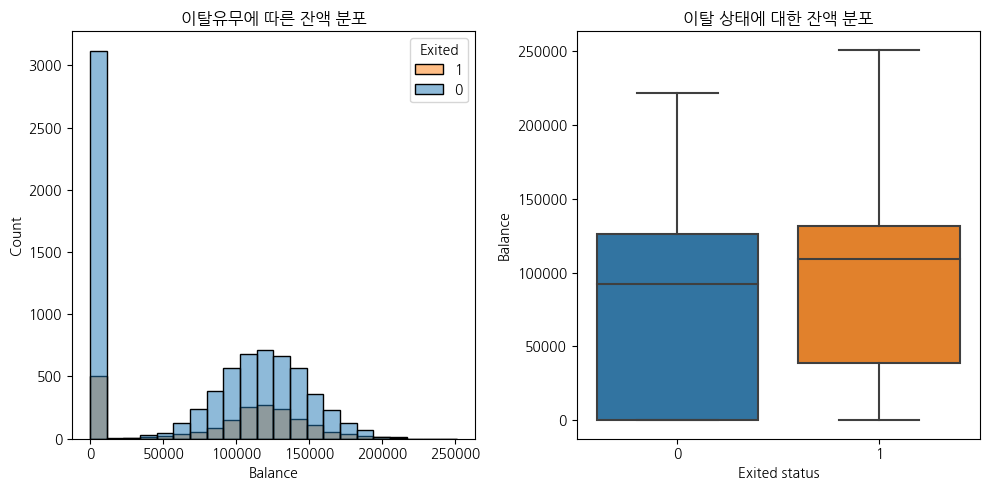

In [17]:
# 이탈유무에 따른 잔액 분포
# 고객기간에 따른 고객이탈률을 boxplot으로 이상치 확인

fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'Balance', hue= 'Exited', ax= ax[0])
ax1.set_title('이탈유무에 따른 잔액 분포')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Balance')
ax2 = sns.boxplot(data= df, y= 'Balance', x= 'Exited', ax= ax[1])
ax2.set_title('이탈 상태에 대한 잔액 분포')
ax2.set_ylabel('Balance')
ax2.set_xlabel('Exited status')

plt.tight_layout()
plt.show()

- 잔액이 0인 경우 이탈을 제일 많이 함

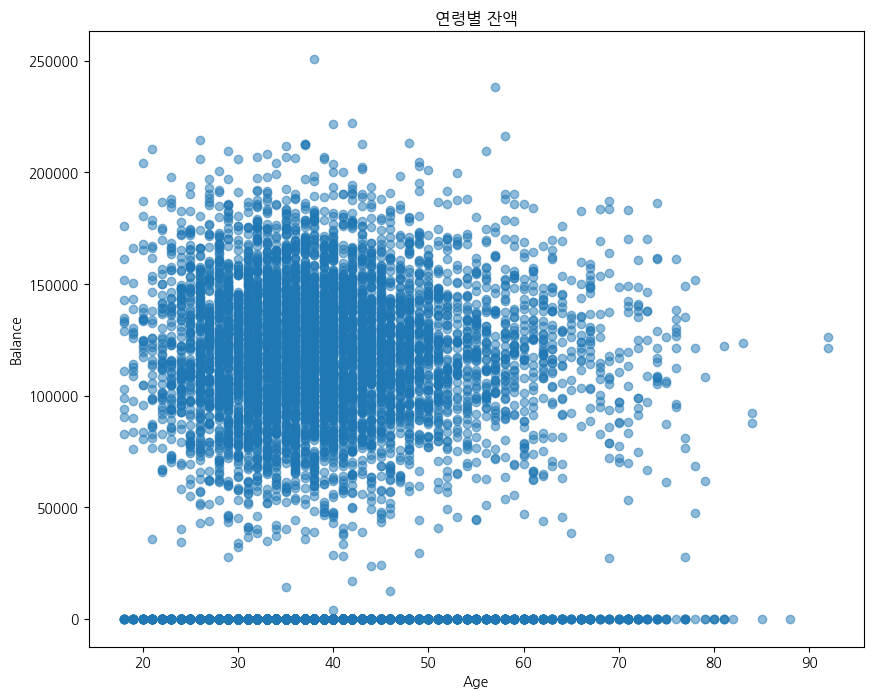

In [18]:
# 나이에 따른 잔액 
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'], df['Balance'], alpha=0.5)
plt.title('연령별 잔액')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

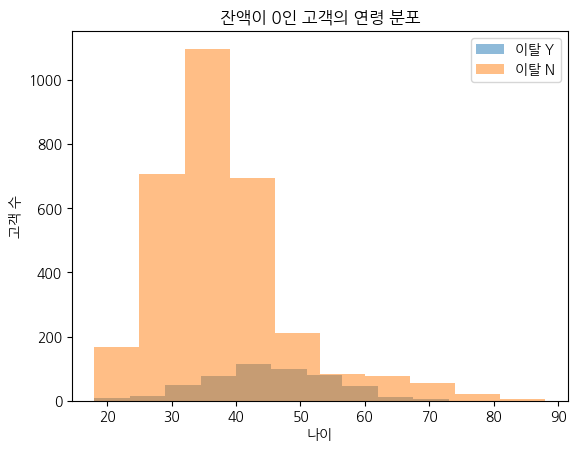

In [19]:
# 잔액이 0인 고객의 연령 분포
zero_balance_customers = df[df['Balance'] == 0]

plt.hist(zero_balance_customers[zero_balance_customers['Exited'] == 1]['Age'], label='이탈 Y', alpha=0.5)
plt.hist(zero_balance_customers[zero_balance_customers['Exited'] == 0]['Age'], label='이탈 N', alpha=0.5)

plt.title('잔액이 0인 고객의 연령 분포')
plt.xlabel('나이')
plt.ylabel('고객 수')
plt.legend()
plt.show()

In [20]:
# 최소, 중간, 최고 잔액 계산
min_balance = df['Balance'].min()
median_balance = df['Balance'].median()
max_balance = df['Balance'].max()

print("Minimum Balance:", min_balance)
print("Median Balance:", median_balance)
print("Maximum Balance:", max_balance)

Minimum Balance: 0.0
Median Balance: 97198.54000000001
Maximum Balance: 250898.09


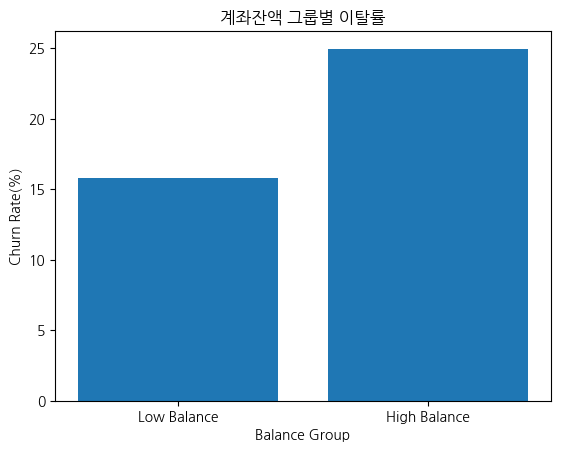

In [21]:
#계좌잔액 그룹별 이탈률

bins = [min_balance, median_balance, max_balance]
labels = ['Low Balance','High Balance']

df['BalanceGroup'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)
balance_counts = df['BalanceGroup'].value_counts().sort_index()

balance_exit_rates = df.groupby('BalanceGroup')['Exited'].mean()*100

plt.bar(balance_exit_rates.index, balance_exit_rates.values)
plt.xlabel('Balance Group')
plt.ylabel('Churn Rate(%)')
plt.title('계좌잔액 그룹별 이탈률')
plt.show()

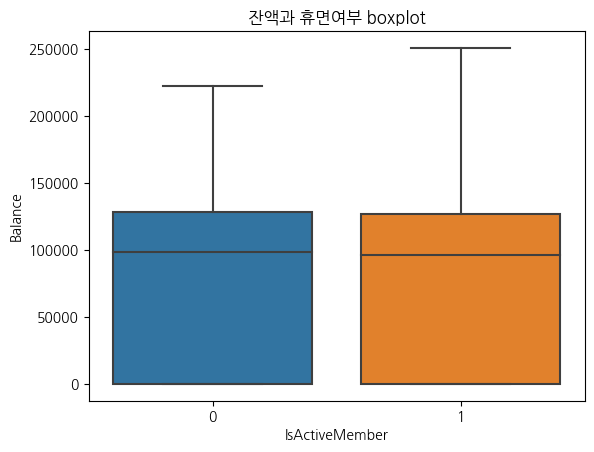

In [22]:
# 잔액과 활성고객여부 boxplot

sns.boxplot(x='IsActiveMember', y='Balance', data=df)

plt.title('잔액과 휴면여부 boxplot')
plt.xlabel('IsActiveMember')
plt.ylabel('Balance')

plt.show()

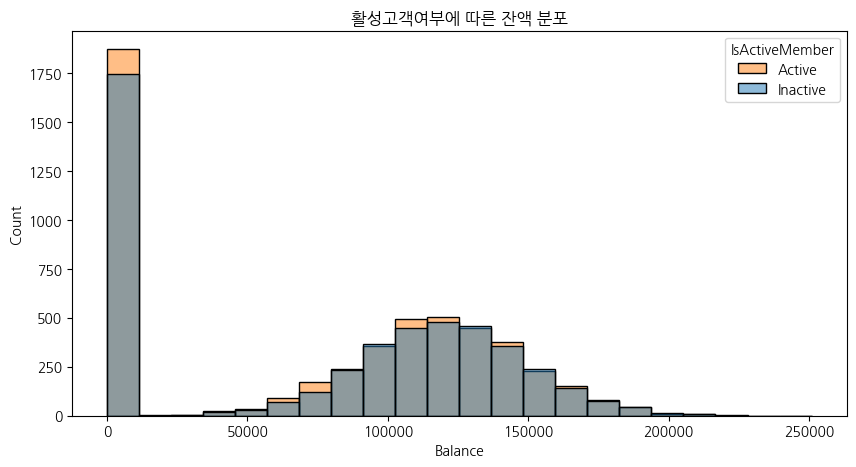

In [23]:
# 활성고객여부에 따른 잔액 분포
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Balance', hue='IsActiveMember')
plt.title('활성고객여부에 따른 잔액 분포')
plt.legend(title='IsActiveMember', labels=['Active', 'Inactive'])
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

## NumOfProducts

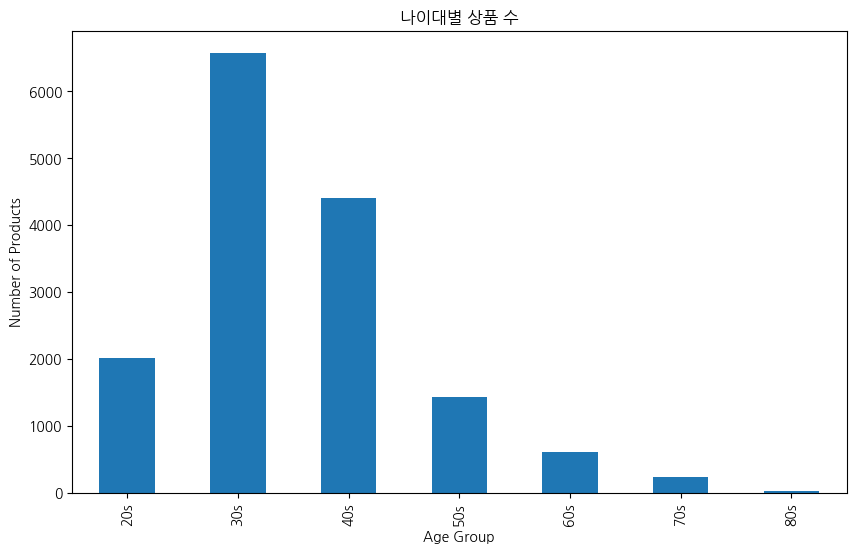

In [24]:
# 나이대별 상품 수 
age_bins = [18, 29, 39, 49, 59, 69, 79, 92]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

agegroup_product_counts = df.groupby('AgeGroup')['NumOfProducts'].sum()
agegroup_product_counts.plot(kind='bar', figsize=(10, 6))

plt.title('나이대별 상품 수')
plt.xlabel('Age Group')
plt.ylabel('Number of Products')
plt.show()

- 30대가 많아서 상품 보유도 30대에 몰림

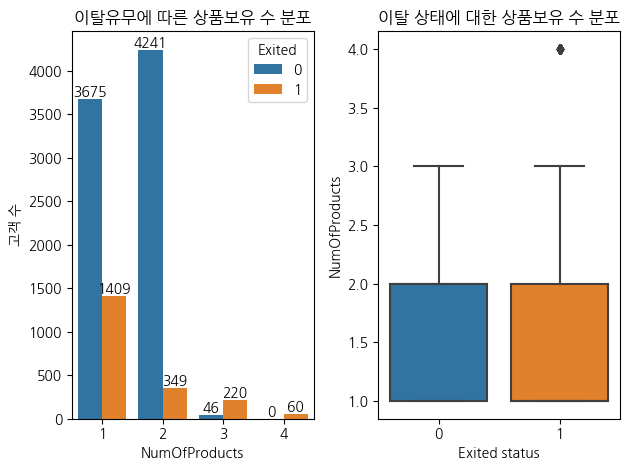

In [32]:
# 이탈유무에 따른 상품보유 수 분포
# 상품보유 수에 따른 고객이탈률을 boxplot으로 이상치 확인

fig, ax = plt.subplots(1, 2)

ax1 = sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=ax[0])
ax1.set_title('이탈유무에 따른 상품보유 수 분포')
ax1.legend(title='Exited', labels=[0, 1])
ax1.set_xlabel('NumOfProducts')
ax1.set_ylabel('고객 수')

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')


ax2 = sns.boxplot(data=df, y='NumOfProducts', x='Exited', ax=ax[1])
ax2.set_title('이탈 상태에 대한 상품보유 수 분포')
ax2.set_ylabel('NumOfProducts')
ax2.set_xlabel('Exited status')

plt.tight_layout()
plt.show()

In [26]:
# 이상치 출력
q1 = df['NumOfProducts'].quantile(0.25)
q3 = df['NumOfProducts'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['NumOfProducts'] < lower_bound) | (df['NumOfProducts'] > upper_bound)]['NumOfProducts']

print("이상치 수:", len(outliers))

이상치 수: 60


상품 4개를 보유한 고객은 전부 이탈함

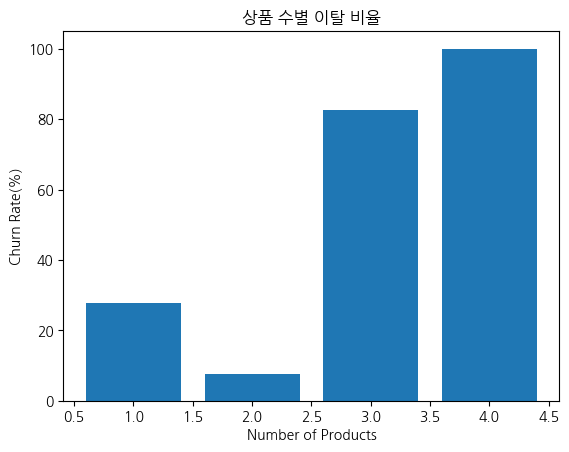

In [27]:
# 상품 수별 이탈 비율을 시각화

product_exit_rates = df.groupby('NumOfProducts')['Exited'].mean()*100

plt.bar(product_exit_rates.index, product_exit_rates.values)
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate(%)')
plt.title('상품 수별 이탈 비율')
plt.show()

https://www.kaggle.com/code/riganeez/customer-churn-prediction-83-4-accuracy

Since NumOfProducts variable has categories with low frequencies, let's group them together based on this logic:

"Does the customer has a product, or more than one?"

Difference between categories is significant so we'll add this feature to our labels. We'll replace NumOfProduct to avoid multicollinearity

위 링크에서 상품보유를 1개와 더 많은 수로 나눔


고객이 보유한 상품갯수 분포와 이탈 비율을 볼 떄, 카테고리 간의 차이가 크다.

따라서 다중공선성을 피하기 위해 'monoproduct'컬럼을 만들어 "NumOfProducts"를 대체할 계획이다.

'monoproduct'는 상품을 하나만 보유한 경우 (1), 상품을 한개 이상 보유한 경우(0)로 이진벡터로 나눌 것이다. 

In [28]:
df['monoproduct'] = df['NumOfProducts'].apply(lambda x: '0' if x > 1 else '1')

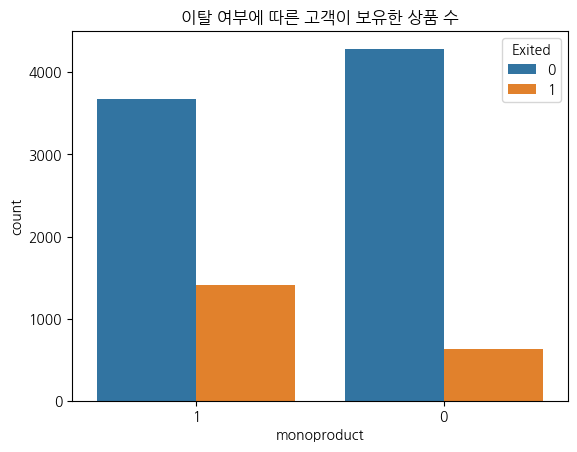

In [29]:
sns.countplot(data=df, x='monoproduct', hue='Exited')
plt.title('이탈 여부에 따른 고객이 보유한 상품 수')
plt.show()

In [30]:
# p-value 계산
from scipy.stats import chi2_contingency

print('p-value: ' + str(chi2_contingency(pd.crosstab(index=df.Exited, columns=df.monoproduct))[1]))

p-value: 2.4302678971395544e-76
